In [243]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns # визуализация данных
import numpy as np
%matplotlib inline

In [244]:
import os
lst = os.listdir('./extracted_data')

lst_data = []
for file in lst:
    lst_data.append(pd.read_csv('./extracted_data/' + file))

In [245]:
all_data = pd.concat(lst_data, ignore_index=True)
all_data

,section_count,max_angle,max_section,average_section,square,time,condition
0,5,90.000000,208.312266,53.679261,13.604793,521.6828,0
1,8,30.566270,733.368257,104.492941,2.749759,1234.1248,0
2,14,67.432991,83.384651,19.959699,56.799247,1422.1607,0
3,1,0.000000,54.083269,54.083269,0.554700,310.1112,0
4,8,323.539717,267.529438,82.138918,127.973177,1554.4516,0
...,...,...,...,...,...,...,...
194,12,356.820170,217.036863,45.416976,13.836139,777.0637,1
195,2,22.919978,837.088406,422.544203,4.904875,525.1386,1
196,4,60.945396,140.758659,38.572589,2.743673,350.3195,1
197,4,21.705011,588.914255,208.320715,32.734019,410.0860,1


In [246]:
tired_state = len(all_data[all_data.condition == 0]) 
awake_state = len(all_data[all_data.condition == 1]) 
n_samples = tired_state if tired_state < awake_state else awake_state
n_samples

82

In [247]:
from sklearn.utils import resample
sampled_0 = resample(all_data[all_data.iloc[:, -1] == 0], replace = False, n_samples = n_samples, random_state=39)
sampled_1 = resample(all_data[all_data.iloc[:, -1] == 1], replace = False, n_samples = n_samples, random_state=39)

all_data = pd.concat([sampled_0, sampled_1])

In [248]:
len(all_data[all_data.condition == 0])

82

In [249]:
len(all_data[all_data.condition == 1])

82

<Axes: >

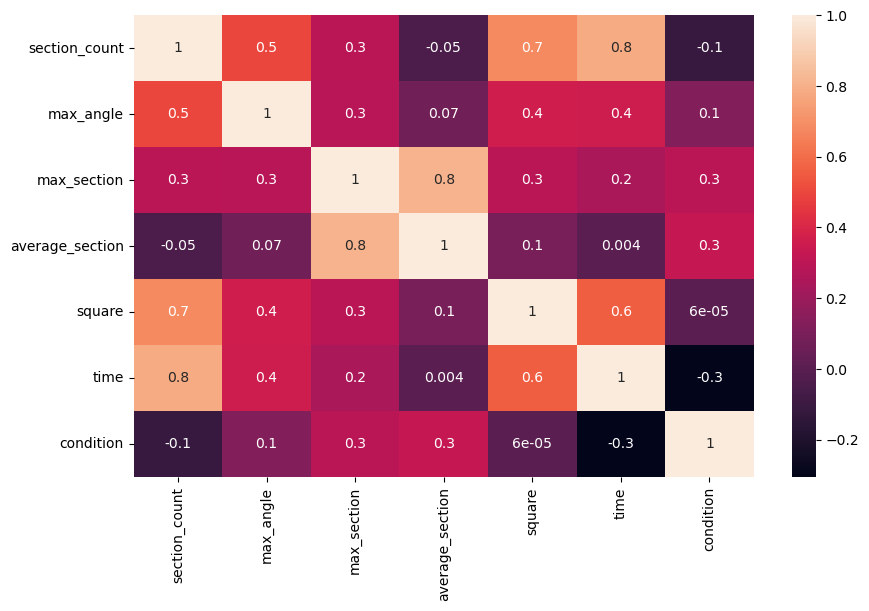

In [250]:
plt.figure(figsize=(10, 6))
sns.heatmap(all_data.corr(), annot = True, fmt = '.1g')

In [251]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 76 to 105
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   section_count    164 non-null    int64  
 1   max_angle        164 non-null    float64
 2   max_section      164 non-null    float64
 3   average_section  164 non-null    float64
 4   square           164 non-null    float64
 5   time             164 non-null    float64
 6   condition        164 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 10.2 KB


In [252]:
Dup_Rows = all_data[all_data.duplicated()]
Dup_Rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   section_count    0 non-null      int64  
 1   max_angle        0 non-null      float64
 2   max_section      0 non-null      float64
 3   average_section  0 non-null      float64
 4   square           0 non-null      float64
 5   time             0 non-null      float64
 6   condition        0 non-null      int64  
dtypes: float64(5), int64(2)
memory usage: 0.0 bytes


In [253]:
all_data.drop_duplicates(keep='first', inplace = True)

array([[<Axes: title={'center': 'section_count'}>,
        <Axes: title={'center': 'max_angle'}>,
        <Axes: title={'center': 'max_section'}>],
       [<Axes: title={'center': 'average_section'}>,
        <Axes: title={'center': 'square'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'condition'}>, <Axes: >, <Axes: >]],
      dtype=object)

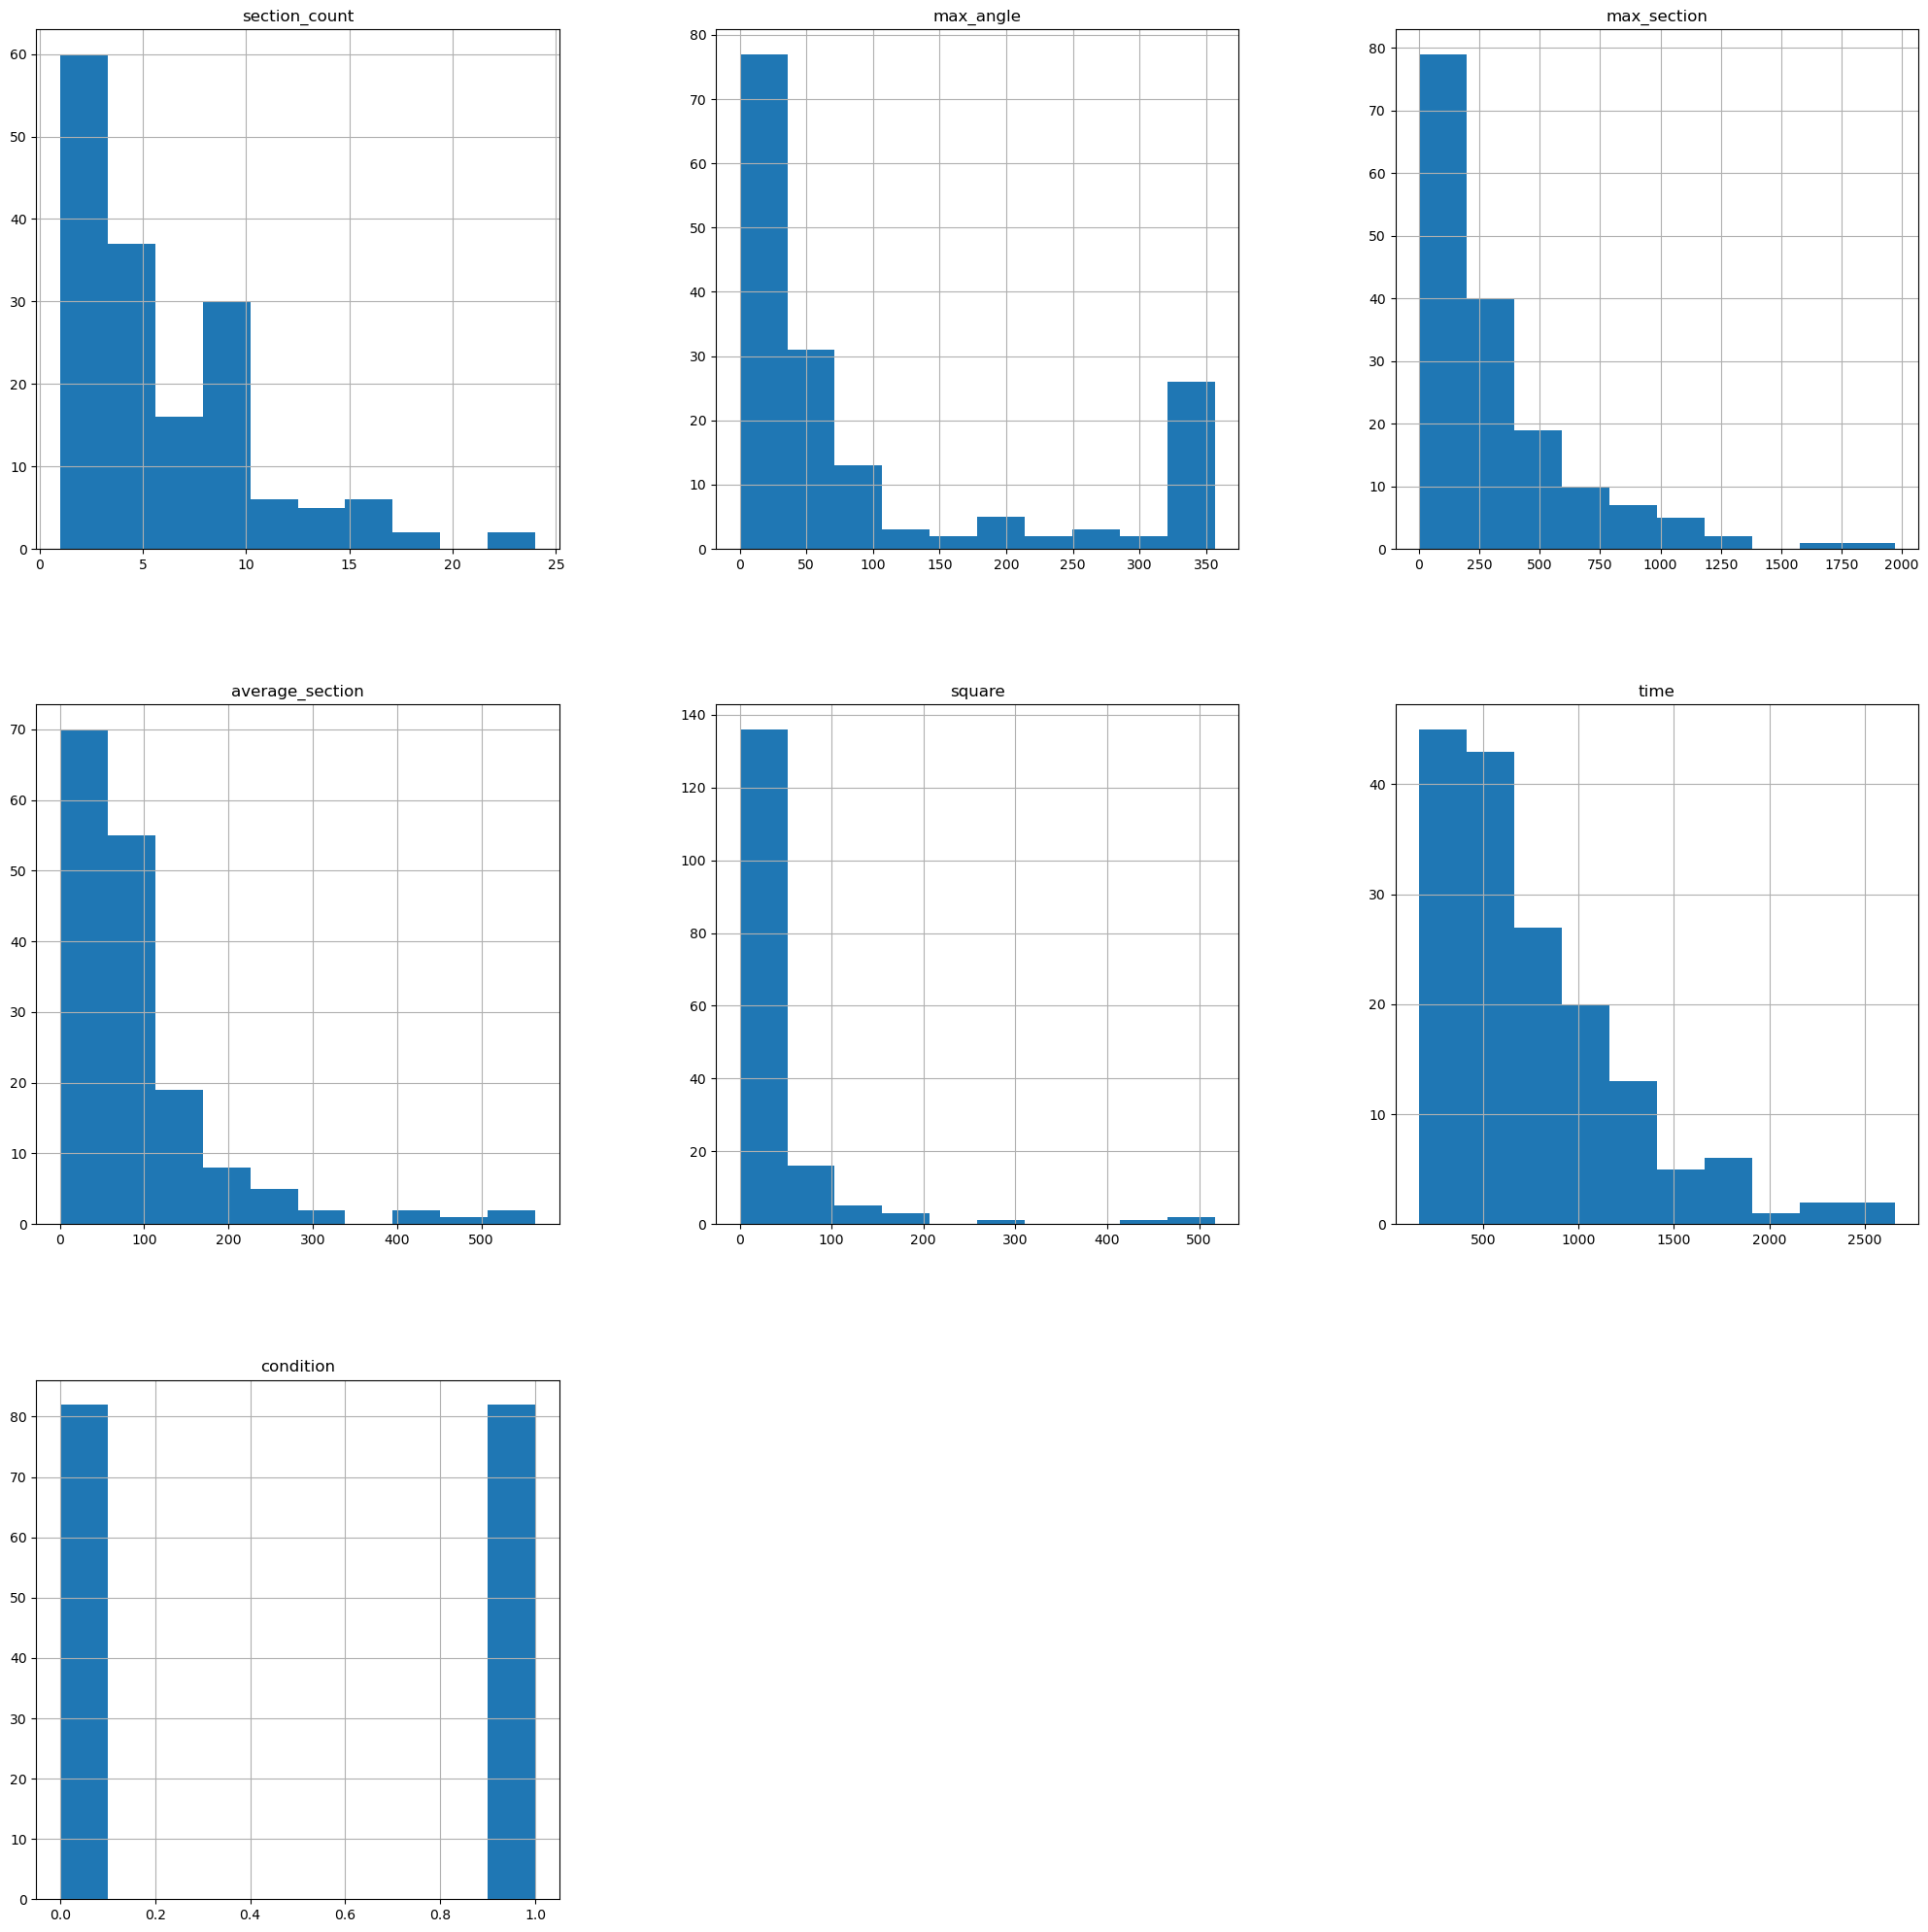

In [254]:
all_data.hist(figsize = (25, 25), grid = True)

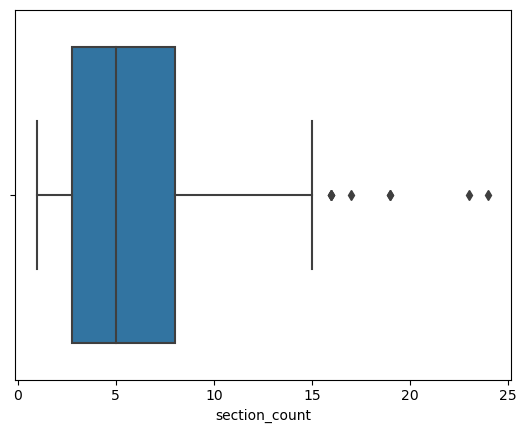

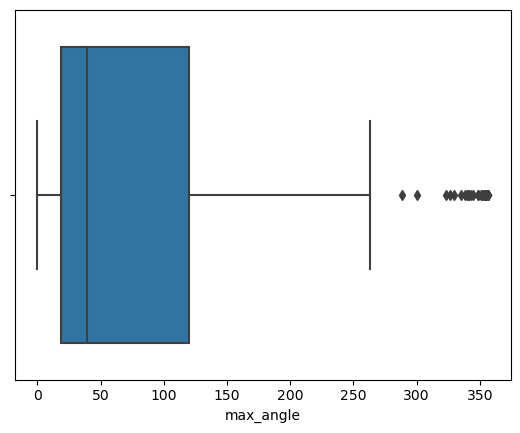

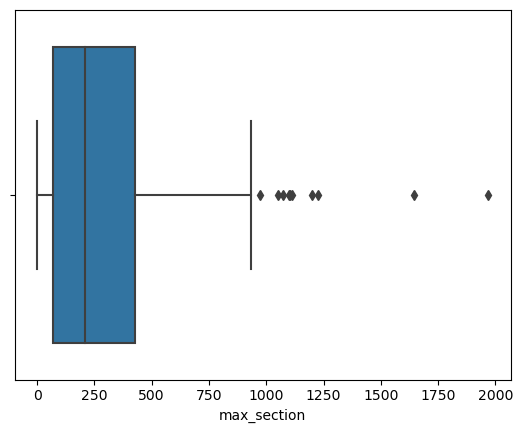

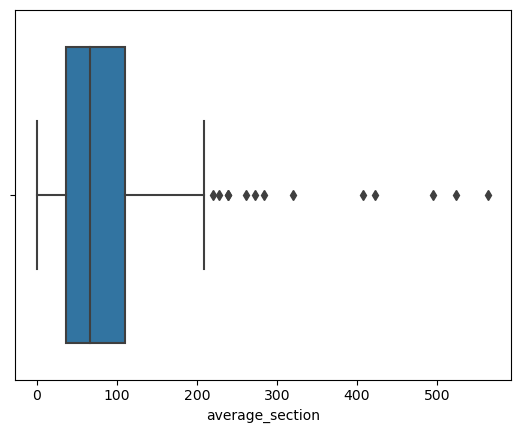

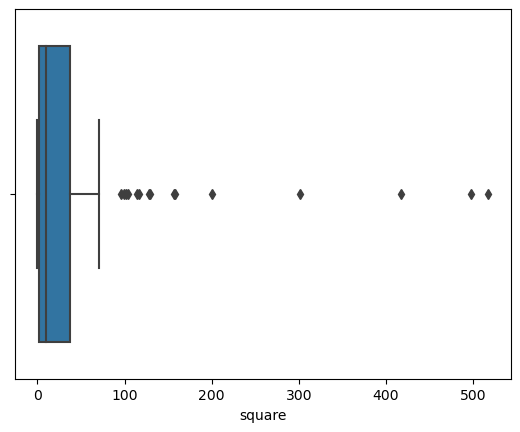

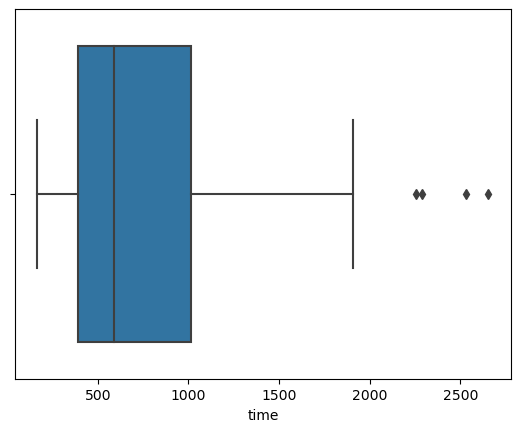

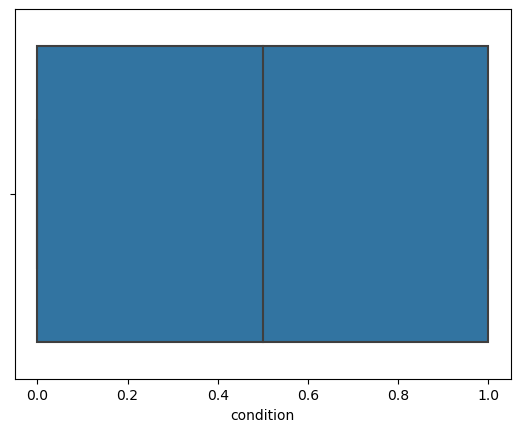

In [255]:
for el in all_data:
    sns.boxplot(x=all_data[el])
    plt.show()

In [256]:
Q1 = all_data.quantile(0.25)
Q3 = all_data.quantile(0.75)
IQR = Q3 - Q1
all_data = all_data[~((all_data < (Q1 - 1.5 * IQR)) |(all_data > (Q3 + 1.5 * IQR))).any(axis=1)]
all_data.shape

(116, 7)

In [257]:
# all_data.hist(figsize = (25, 25), grid = True)

In [258]:
# for el in all_data:
#     sns.boxplot(x=all_data[el])
#     plt.show()

In [259]:
# plt.figure(figsize=(10, 6))
# sns.heatmap(all_data.corr(), annot = True, fmt = '.1g')

In [260]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(all_data.drop('condition', axis = 1)),
            columns=all_data.drop('condition', axis = 1).columns, index=all_data.drop('condition', axis = 1).index)
df['condition'] = all_data.condition

all_data = df

array([[<Axes: title={'center': 'section_count'}>,
        <Axes: title={'center': 'max_angle'}>,
        <Axes: title={'center': 'max_section'}>],
       [<Axes: title={'center': 'average_section'}>,
        <Axes: title={'center': 'square'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'condition'}>, <Axes: >, <Axes: >]],
      dtype=object)

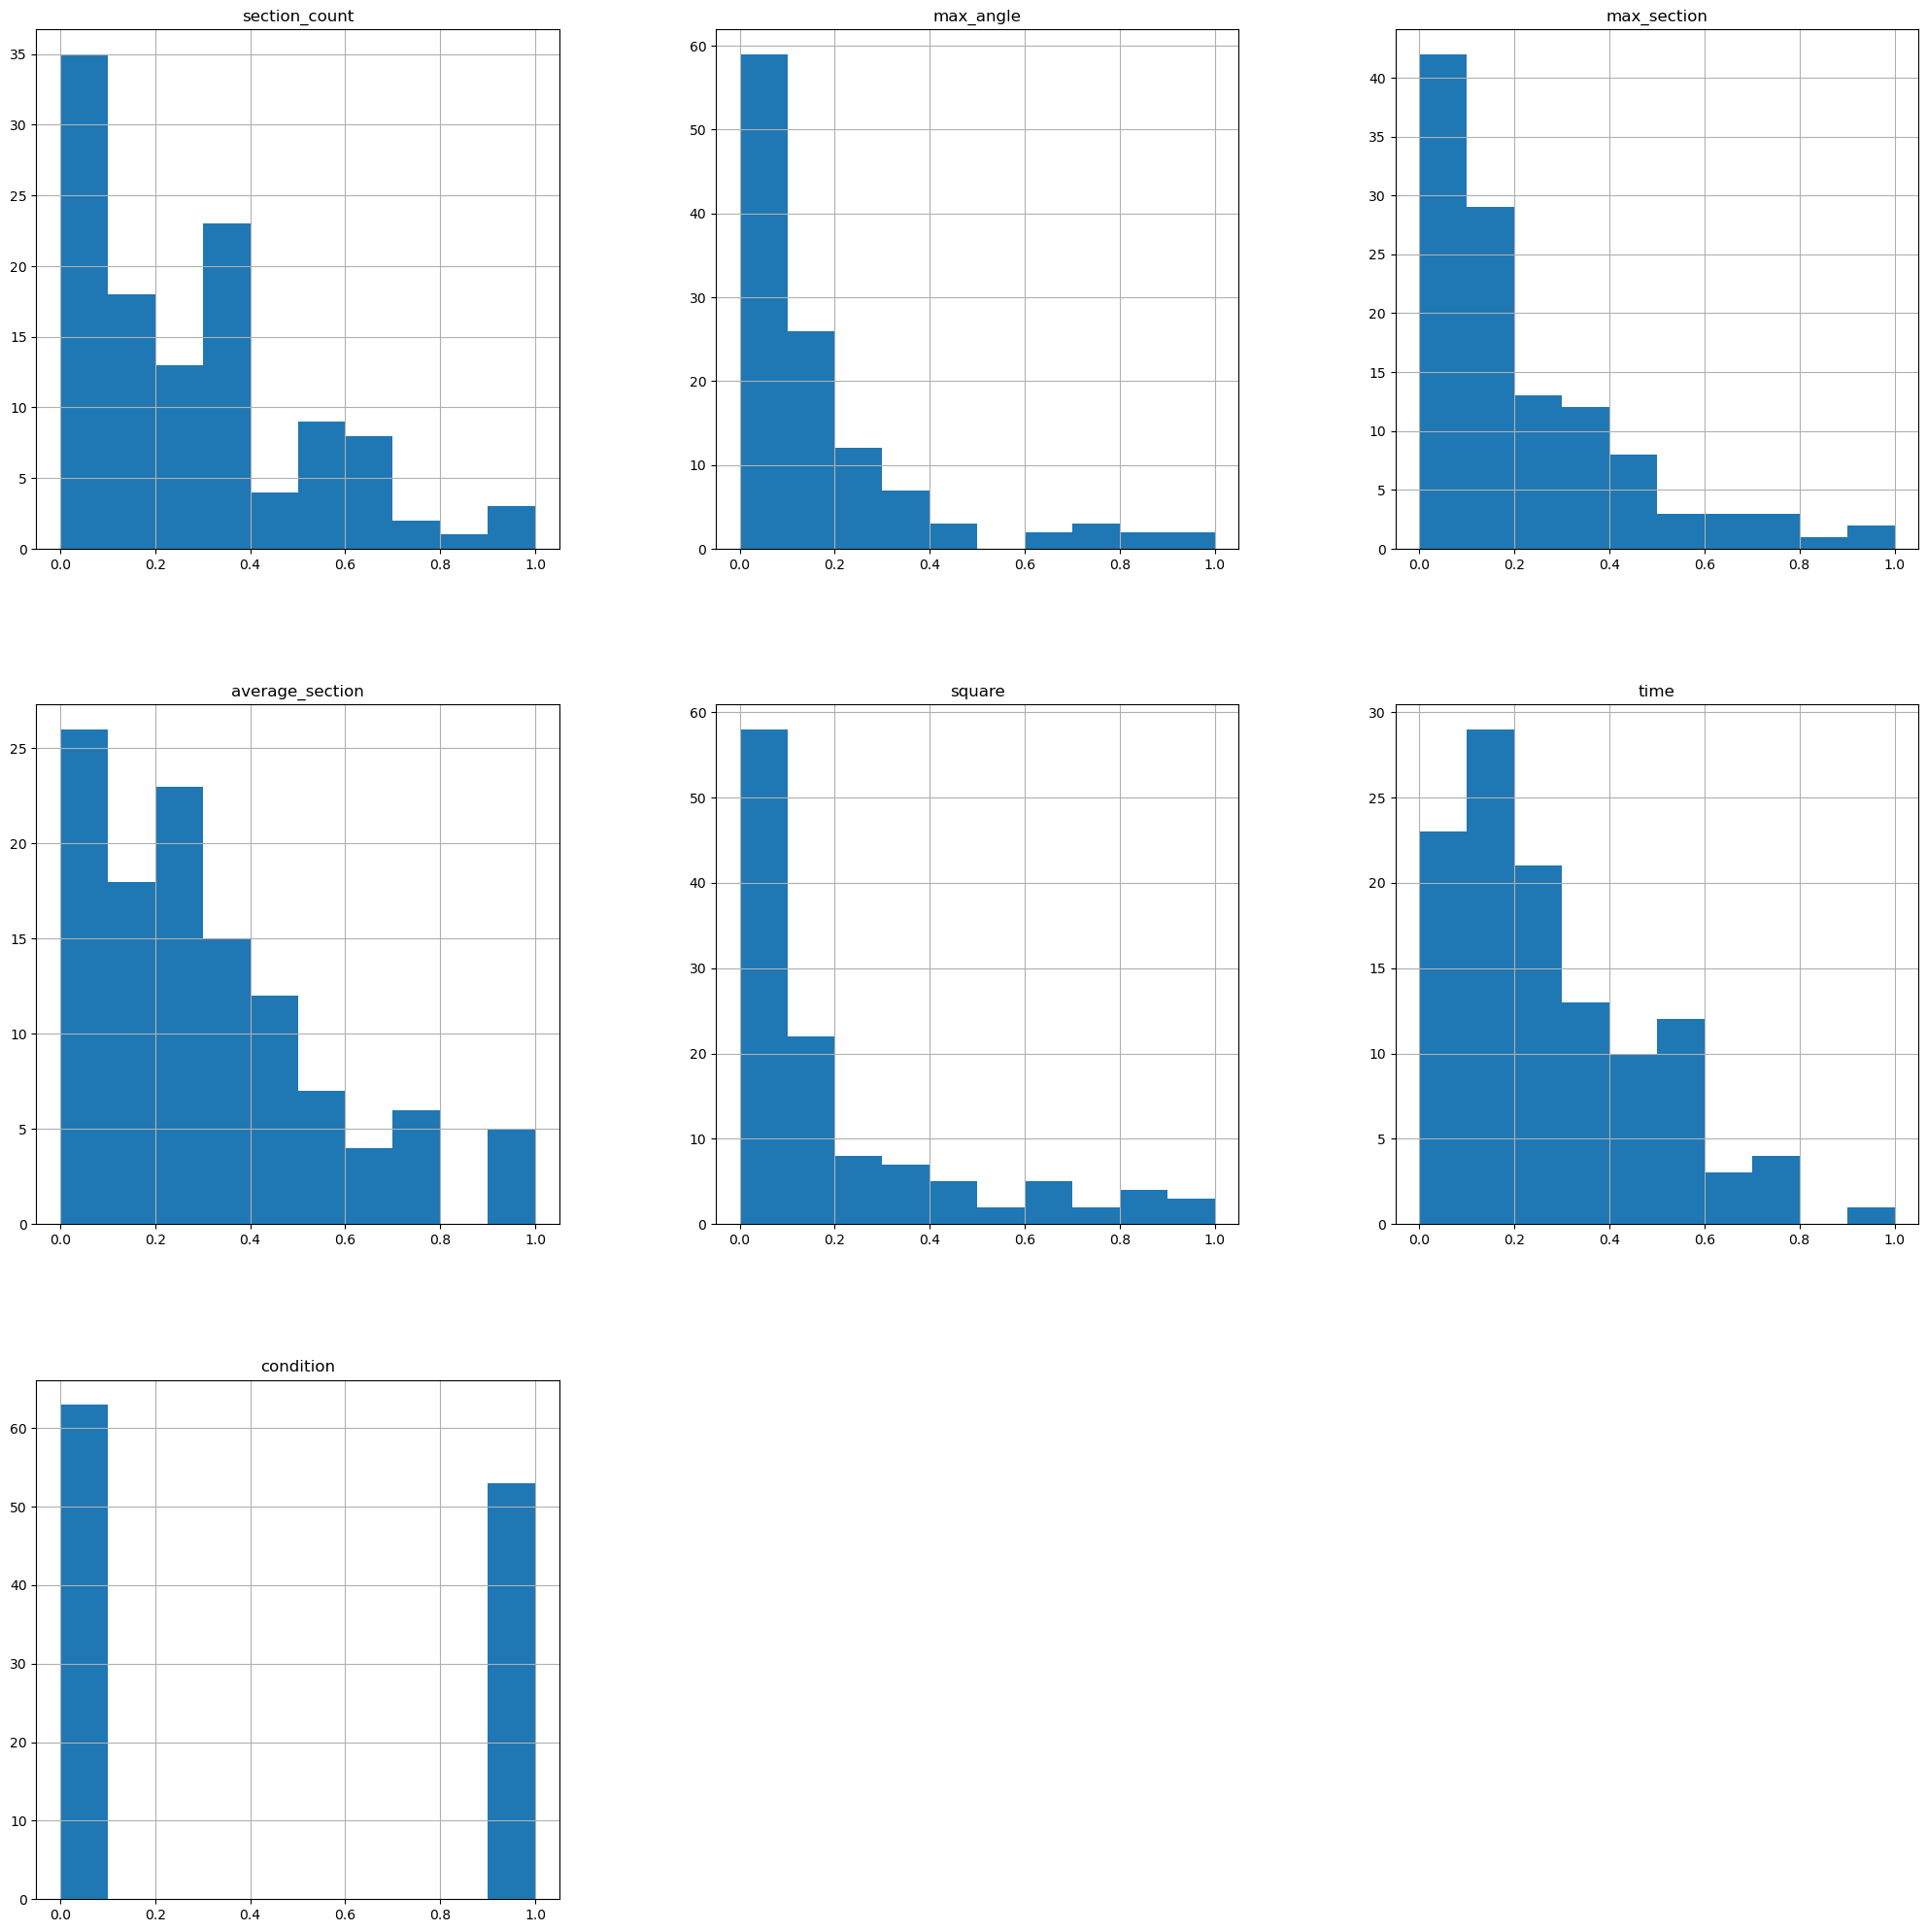

In [261]:
all_data.hist(figsize = (25, 25), grid = True)

Обучение

In [262]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, label_binarize

In [263]:
X = all_data.drop(['condition'], axis = 1)
y = all_data.condition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [264]:
X_train

,section_count,max_angle,max_section,average_section,square,time
153,0.000000,0.000000,0.158297,0.618321,0.000000,0.073701
65,0.307692,0.080228,0.411595,0.365088,0.143974,0.532021
129,0.307692,0.089677,0.397136,0.433000,0.098142,0.233522
124,0.000000,0.000000,0.013604,0.055336,0.000000,0.056491
63,0.307692,0.165804,0.141241,0.182590,0.246305,0.462871
...,...,...,...,...,...,...
116,0.307692,0.080491,0.429136,0.917278,0.403331,0.327819
89,0.307692,0.133238,0.253757,0.246870,0.028355,0.450197
15,0.000000,0.000000,0.170669,0.666457,0.007369,0.253224
17,0.153846,0.070247,0.423356,0.753247,0.152845,0.155801


In [265]:
y_train

153    1
65     0
129    1
124    1
63     0
      ..
116    1
89     1
15     0
17     0
69     0
Name: condition, Length: 92, dtype: int64

Градиентый бустинг

In [266]:
from xgboost import XGBClassifier

In [267]:
grid_param = {'learning_rate': [0.02], 
        'min_child_weight': [1, 5],
        'max_depth': [10, 50, 100],
        'n_estimators': [50, 100, 500]
        }

In [268]:
xgb = XGBClassifier()
grid_xgb = GridSearchCV(xgb, grid_param, cv = 5)

grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.02], 'max_depth': [10, 50, 100],
                         'min_child_weight': [1, 5],
                         'n_estimators': [50, 100, 500]})

In [269]:
best_clf = grid_xgb.best_estimator_
best_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.02,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 10,
 'max_leaves': None,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 500,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [270]:
y_pred = best_clf.predict(X_test)

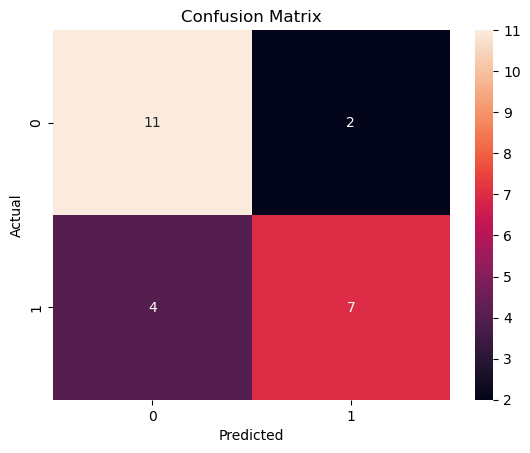

In [271]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [272]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.73      0.85      0.79        13
     class 1       0.78      0.64      0.70        11

    accuracy                           0.75        24
   macro avg       0.76      0.74      0.74        24
weighted avg       0.75      0.75      0.75        24



Случайный лес

In [273]:
grid_param = {
    'n_estimators': [50, 100, 200, 400],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(2, 16, 4)
}

In [274]:
rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(rfc, grid_param, cv = 5, n_jobs=-1)

grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 16, 4),
                         'n_estimators': [50, 100, 200, 400]})

In [275]:
best_clf = grid_rfc.best_estimator_
best_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [276]:
y_pred = best_clf.predict(X_test)

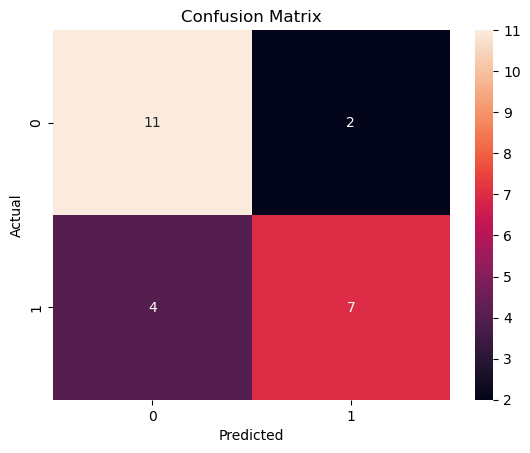

In [277]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [278]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.73      0.85      0.79        13
     class 1       0.78      0.64      0.70        11

    accuracy                           0.75        24
   macro avg       0.76      0.74      0.74        24
weighted avg       0.75      0.75      0.75        24



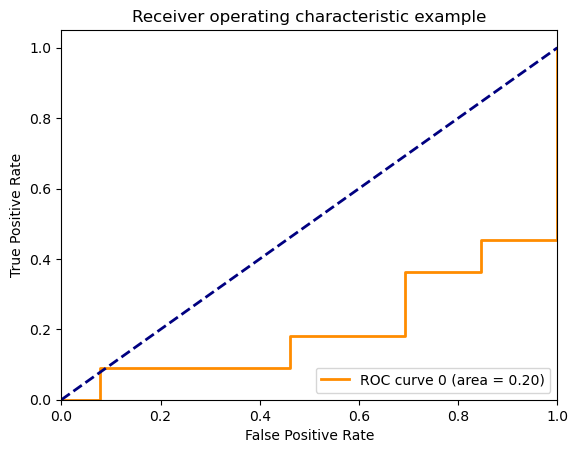

In [279]:
y_roc = label_binarize(y, classes = [0, 1])
y_test_roc = label_binarize(y_test, classes = [0, 1])
n_classes = y_roc.shape[1]

y_score = best_clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve 0 (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

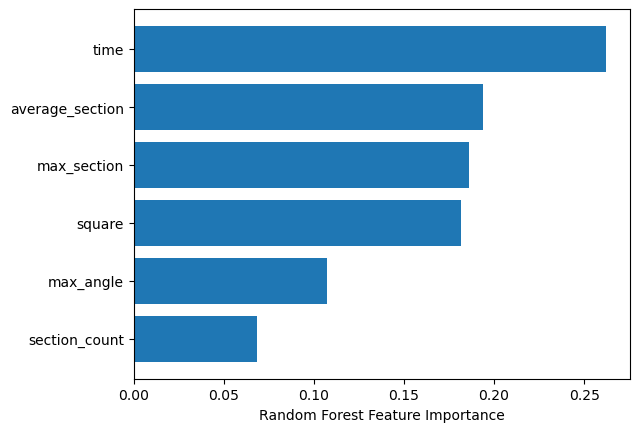

In [280]:
sorted_idx = best_clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], best_clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [281]:
np.sum(best_clf.feature_importances_)

1.0

KNN

In [282]:
grid_params = {'n_neighbors' : [i for i in range(1, 11)],
                'weights': ['uniform', 'distance'],
                'metric' : ['euclidean', 'manhattan']}

In [283]:
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, grid_params, verbose = 1, cv = 3, n_jobs = -1)
grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [284]:
best_clf = grid_knn.best_estimator_
best_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'distance'}

In [285]:
y_pred = best_clf.predict(X_test)

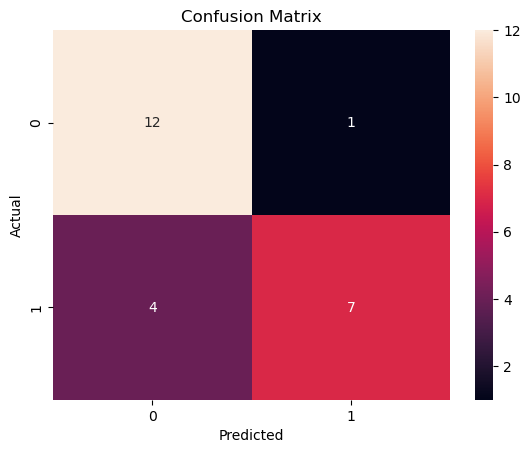

In [286]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [287]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.75      0.92      0.83        13
     class 1       0.88      0.64      0.74        11

    accuracy                           0.79        24
   macro avg       0.81      0.78      0.78        24
weighted avg       0.81      0.79      0.79        24



SVM

In [288]:
from sklearn.svm import SVC
param_grid = {  'C': [0.1, 1, 10],
                'kernel': ['rbf', 'sigmoid']}

In [289]:
svc_clas = SVC()
grid_svm = GridSearchCV(svc_clas, param_grid, refit = True, cv = 3, n_jobs = -1)

grid_svm.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['rbf', 'sigmoid']})

In [290]:
best_clf = grid_svm.best_estimator_
best_clf.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [291]:
y_pred = best_clf.predict(X_test)

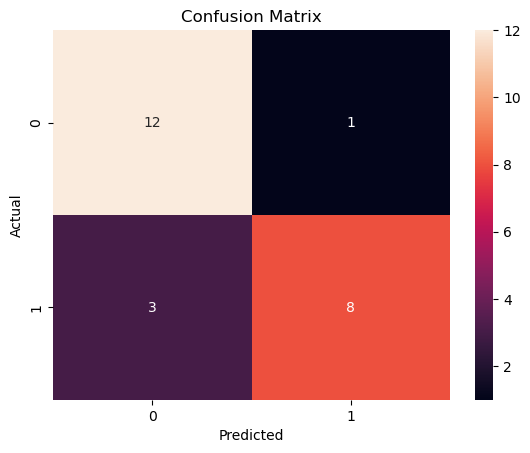

In [292]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [293]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.80      0.92      0.86        13
     class 1       0.89      0.73      0.80        11

    accuracy                           0.83        24
   macro avg       0.84      0.83      0.83        24
weighted avg       0.84      0.83      0.83        24

